## Lagrange interpolation

Given $(n+1)$ distinct points $\{q_i\}_{i=0}^n$ in the interval $[0,1]$,
we define the *Lagrange interpolation* operator $\mathcal{L}^n$ the operator
$$
\mathcal{L}^n : C^0([0,1]) \mapsto \mathcal{P}^n
$$
which satisfies
$$
(\mathcal{L}^n f)(q_i) = f(q_i), \qquad i=0,\dots,n.
$$

This operator is used to approximate the infinitely dimensional space $C^0([0,1])$ with a
finite dimensional one, $\mathcal{P}^n$, which is the space of polynomials of order n. 

Such a space has dimension $n+1$, and can be constructed using linear combinations of 
monomials of order $\leq n$:

$$
\mathcal{P}^n = \text{span}\{p_i := x^i\}_{i=0}^{n}
$$

Let's start by importing the usual suspects:

In [4]:
%matplotlib inline
from numpy import *
from pylab import *

In what follows, we will plot several functions in the interval $[0,1]$, 
so we start by defining a linear space used for plotting. As a good habit, 
we choose a number of points which would generate intervals that are 
exactly representable in terms of a binary base.

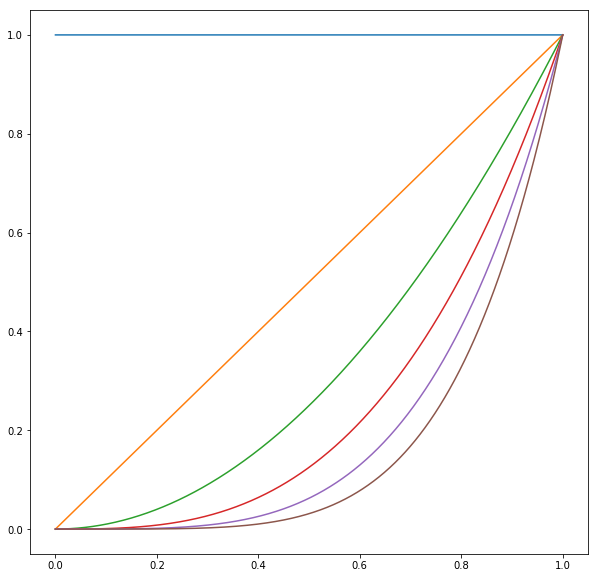

In [6]:
ref = 1025 # So that x_i+1 - x_i is exactly representable in base 2
x = linspace(0,1,ref)

n = 5 # Polynomials of order 5, with dimension 6

# We compute the basis of Pn row-wise. This is memory efficient if we want to access
# all the values of the basis at once. 
Pn = zeros((ref, n+1))

for i in range(n+1):
    Pn[:, i] = x**i
    
# The _ = in front of the plot command is only there to ignore the output of the plot
# command
figure(figsize=[10,10])
_ = plot(x, Pn)    


If we want to construct the Lagrange interpolation of a given function on $n+1$ equispaced points in 
$[0,1]$, then we are actively looking for an element of $\mathcal{P}^n$ that coincides with the function
at these given points.

Given a basis $\{v_i\}_{i=0}^n$, any element of $\mathcal{P}^n$ can be written as a linear combination of 
the basis, i.e., 

$$
\forall u \in \mathcal{P}^n, \quad  \exists! \{u^i\}_{i=0}^n  \quad| \quad u(x) = \sum_{i=0}^n u^i v_i(x)
$$

in what follows, we'll use [Einstein summation convention](https://en.wikipedia.org/wiki/Einstein_notation), and 
call $u$ both the function of $\mathcal{P}^n$, or the $R^{n+1}$ vector representing its coefficients. 

**Remark on the notation (advanced topic. Ignore if you don't understand it)**

We use upper indices to indicate both "contravariant" coefficients and the *canonical basis of the dual space*, 
i.e., the linear functionals in $(\mathcal{P}^n)^*$ such that 

$$
(\mathcal{P}^n)^* := \text{span}\{v^i\}_{i=0}^{n} \qquad | \qquad v^i(v_j) = \delta^i_j\qquad i,j = 0, \ldots, n
$$

With this notation, we have that the coefficients of a polynomial are uniquely determined by

$$
u^i = v^i(u)
$$

where the $u$ on the right hand side is an element of $\mathcal{P}^n$ (not its coefficients).

If we want to solve the interpolation problem above, then we need to find the coefficients $u^i$ of the 
polynomial $u$ that interpolates $f$ at the points $q_i$:

$$
v_j(q_i) u^j = f(q_i)
$$

(Remember Einstein summation convention)

This can be written as a linear problem $A u = F$, with system matrix $A_{ij} :=  v_j(q_i)$ and right 
hand side $F_i = f(q_i)$.

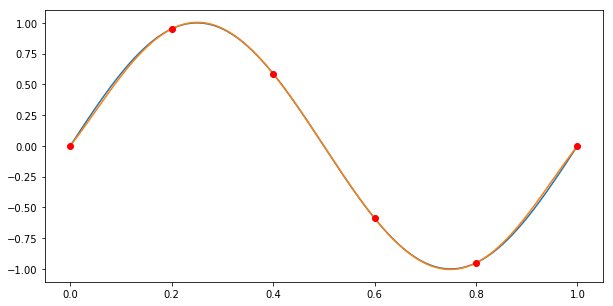

In [7]:
# The interpolation points
q = linspace(0,1,n+1)

A = zeros((n+1, n+1))
for j in range(n+1):
    A[:,j] = q**j

# The interpolation function
f = lambda x: sin(2*pi*x)

# The right hand side
F = f(q)

# The coefficients
u = linalg.solve(A, F)

# Make a nice looking plot
figure(figsize=[10,5])
_ = plot(x, f(x))
_ = plot(x, Pn.dot(u))
_ = plot(q, f(q), 'ro')

# Condition number of interpolation

What is the condition number of this problem? 

Given a set of $n+1$ (distinct) points $\{q_i\}_{i=0}^{n}$, and a basis $\{p_i\}_{i=0}^{n}$ for the polynomial space $P^n([0,1])$ (that has dimension $n+1$), we would like to estimate the condition number of the interpolation problem, defined as

> Given a function $g \in C^0([0,1])$, find the polynomial $p \in P^n([0,1])$ such that $p(q_i) = g(q_i)$ for all $i=0,\dots,n$.

**Parameters of the problem: the points $q_i$**

**Input of the problem: the function $g$**

**Output of the problem: the polynomial $p$ in $P^n$, where $n=len(q)-1$**

If we have a basis $v_i$ for $P^n$, any polynomial in $P^n$ can be written as

$$p(x) = p^i v_i(x)$$

A possible algorithm for the interpolation problem then can obtained as:

- Define a basis of $P^n$ (basis = set of $n+1$ linearly independent functions, whose linear combination covers the entire space $P^n$). For example: $p_i = x^i$
- Evaluate the function we want to interpolate in $q_i$. Call the resulting vector $g_i: g(q_i)$ for $i=0,\dots,n$
- Write $p(x) = p^i v_i$ (sum is implied for repeated indices), and impose that $p(q_i) = g(q_i)$, i.e.: $p^j v_j(q_i) = g(q_i)$ or:
    - Construct the **interpolation matrix**: $A_{ij} = v_j(q_i)$
    - Solve the linear system $A_{ij} p^j = g(q_i)$
 
**NOTATION:** We indicate the coefficients of the inverse of the matrix with coefficients $A_{ij}$ using the following notation: $A^{ij} = (A^{-1})_{ij}$, that is, we define 

$$ A^{ij} A_{jk} = \delta^i_k$$ 

Where $\delta^i_k$ is one if $i = j$ and zero otherwise (the identity, or Kronecker delta).

## How do we estimate the absolute condition number of the problem? 

Given a perturbation function $\delta g$, the interpolation of $g+\delta g$ results in a perturbed polynomial $p+\delta p$, where, by linearity, $\delta p$ interpolates $\delta g$, i.e., $\delta p^i = A^{ij} \delta g(q_j)$.

We would like to estimate 

$$ K_{abs} := \sup_{\delta g \in C^0([0,1])} \frac{\|\delta p\|_{\infty}}{\|\delta g\|_{\infty}} $$ 

where $\| v \|_{\infty} := \max_{x\in[0,1]} |v(x)|$ is the $L^\infty$ norm of the function $v$.

We start by estimating the numerator:

$$ \|\delta p\|_\infty = \|\delta p^i v_i \|_\infty \leq \max_i |\delta p^i| \quad \left\|\sum_i |v_i|\right\|_\infty 
\leq  \max_i |A^{ij}\delta g^j| \quad \left\|\sum_i |v_i|\right\|_\infty  \leq C \|A\| \quad \max_i |\delta g^j| \quad \left\|\sum_i |v_i|\right\|_\infty$$

Now we observe that the second term is always bounded by $\max_{x\in[0,1]}|g(x)|$, i.e., 

$$ \sup_{\delta g \in C^0([0,1])} \frac{\max_i |\delta g^j|}{\|\delta g\|_\infty} \leq 1$$

and therefore:

$$ K_{abs} := \sup_{\delta g \in C^0([0,1])} \frac{\|\delta p\|_{\infty}}{\|\delta g\|_{\infty}} \leq C \|A\| \quad \left\|\sum_i |v_i|\right\|_\infty$$.

The condition number depends on three parts: 
- the constant $C$, depending on the norm type we chose for $A$ and on $n$
- the norm of the matrix $A$
- the quantity $ \left\|\sum_i |v_i|\right\|_\infty$

Let's start by evaluating the norm of $A$ for the monomial basis, and the norm of the last term when we increase $n$:

In [8]:
for i in range(3,15):
    qtmp = linspace(0,1,i)
    Atmp = zeros((i,i))
    Ltmp = zeros((ref,i))
    for j in range(i):
        Atmp[:,j] = qtmp**j
        Ltmp[:,j] = x**j
    
    lebesgue = max(sum(abs(Ltmp), axis=1))
    
    print("Matrix condition number: ( n = ", i, "):", linalg.cond(Atmp), ", Basis condition number: ", lebesgue)


Matrix condition number: ( n =  3 ): 15.099657722502098 , Basis condition number:  3.0
Matrix condition number: ( n =  4 ): 98.86773850722759 , Basis condition number:  4.0
Matrix condition number: ( n =  5 ): 686.4349418185955 , Basis condition number:  5.0
Matrix condition number: ( n =  6 ): 4924.371056611224 , Basis condition number:  6.0
Matrix condition number: ( n =  7 ): 36061.16088021232 , Basis condition number:  7.0
Matrix condition number: ( n =  8 ): 267816.7009075794 , Basis condition number:  8.0
Matrix condition number: ( n =  9 ): 2009396.3800421846 , Basis condition number:  9.0
Matrix condition number: ( n =  10 ): 15193229.677753646 , Basis condition number:  10.0
Matrix condition number: ( n =  11 ): 115575244.54431371 , Basis condition number:  11.0
Matrix condition number: ( n =  12 ): 883478687.0721825 , Basis condition number:  12.0
Matrix condition number: ( n =  13 ): 6780588492.454725 , Basis condition number:  13.0
Matrix condition number: ( n =  14 ): 5221

As we see, the condition number of this matrix explodes as n increases. Since the interpolation problem 
reduces to solving the matrix constructed as $A_{ij} := p_j(x_i)$, one way to ensure a good condition number (of the matrix!)
is to choose the basis such that $A$ is the identity matrix, i.e., to choose the basis such that $v_j(x_i) = \delta_{ij}$. Such a basis is called the **Lagrange basis**, and it is constructed explicitly as:


$$
l^n_i(x) := \prod_{j=0, j\neq i}^n \frac{(x-x_j)}{(x_i-x_j)}  \qquad
i = 0, \dots, n
$$

With this basis, no matrix inversion is required, and we can simply write the Lagrange interpolation as
$$
\mathcal{L}^n f := \sum_{i=0}^n f(x_i) l^n_i(x),
$$

> Given a set of $(n+1)$ distinct points
> $\{x_i\}_{i=0}^n$ , there exist a unique Lagrange interpolation of order
> $n$.

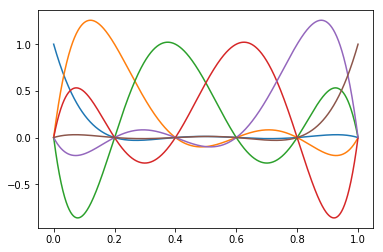

In [11]:
Ln = zeros((ref, n+1))

for i in range(n+1):
    Ln[:,i] = product([ (x-q[j])/(q[i]-q[j]) for j in range(n+1) if j != i], axis=0)
    
_ = plot(x,Ln)

Notice that we can also write `Ln` as the inverse of the matrix $A$, applied to `Pn.T`.

Start by considering the Lagrange interpolation of the Lagrange basis $l_k$, i.e., 

$$p^i = A^{ij} l_k(q_j) = A^{ij} \delta_{jk} = A^{ik}$$

To plot these coefficients (i.e., to evaluate the polynomial with coefficients $A^{ik}$ at fixed $k$ in the points $x_i$), we simply multipy $A^{ik}$ with $v_k(x_m)$, i.e. `Pn[m,k]`, or `Ln[j,k] = P[j,i] * Ainv[i,k]

In other words, the $i$-th row of the matrix $A^{-1}$, represent the monomial coefficients of the lagrange basis $l_k$:

In [40]:
Ainv = linalg.inv(A)
Ln2 = Pn.dot(Ainv)

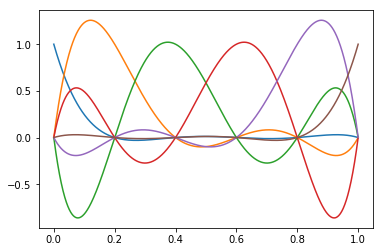

In [41]:
_ = plot(x, Ln2)

Now let's see how this influences the second part of the condition number, when we increase $n$:

In [43]:
for i in range(3,15):
    qtmp = linspace(0,1,i)
    Atmp = zeros((i,i))
    Ltmp = zeros((ref,i))
    for j in range(i):
        Atmp[:,j] = qtmp**j
        Ltmp[:,j] = x**j
    Atmpinv = linalg.inv(Atmp)
    Ltmp = Ltmp.dot(Atmpinv)
    
    lebesgue = max(sum(abs(Ltmp), axis=1))
    
    print("Basis condition number: ", lebesgue)

Basis condition number:  1.25
Basis condition number:  1.63113015145
Basis condition number:  2.20780651848
Basis condition number:  3.10625250475
Basis condition number:  4.54922445348
Basis condition number:  6.92965436212
Basis condition number:  10.945053242
Basis condition number:  17.8483184256
Basis condition number:  29.896585432
Basis condition number:  51.2103586366
Basis condition number:  89.316570459
Basis condition number:  158.091100976


As you see, the global condition number is now much smaller. The identity has condition number 1, and the basis reaches a condition number of about 160. **DO NOT** use `A` to compute the Lagrange basis!!! In this way, you are polluting your basis with a bad condition number from the matrix. Construct explicitly the basis using the explicit construction. 

That construction suffers from the bad condition number of the substraction when the number of points is very large, but otherwise shows the same behaviour you see up here.

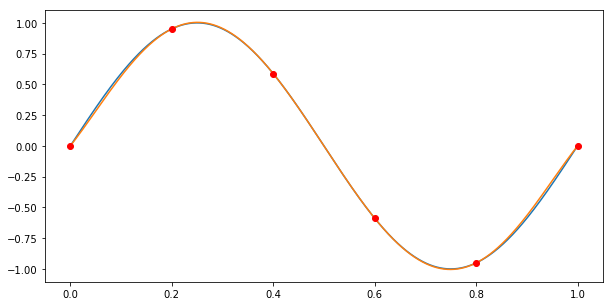

In [29]:
y = Ln2.dot(f(q))

figure(figsize=[10,5])
_ = plot(x, f(x))
_ = plot(x, y)
_ = plot(q, f(q), 'ro')

Let's try different functions:

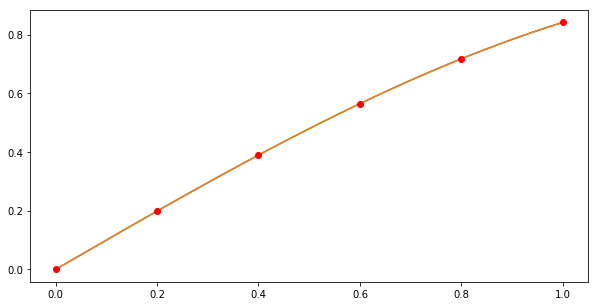

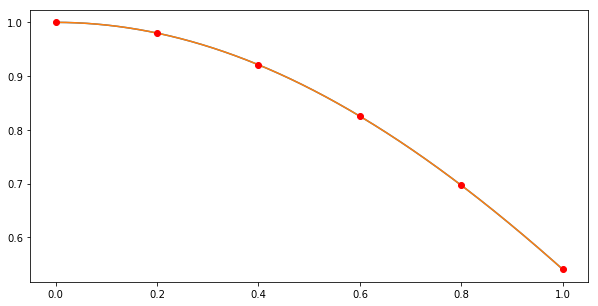

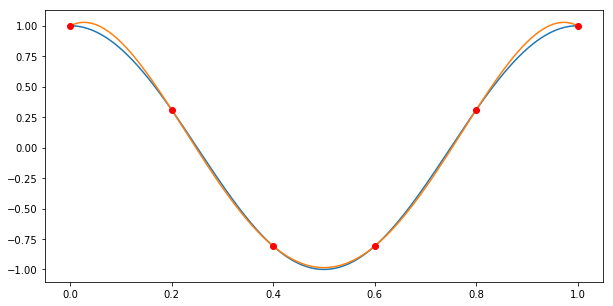

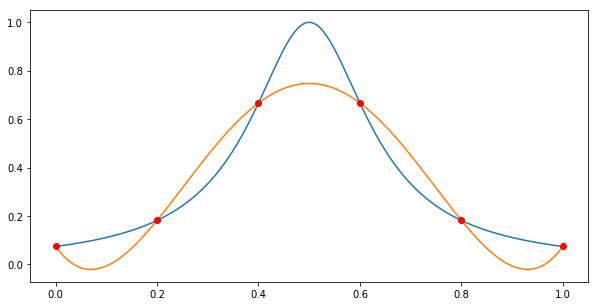

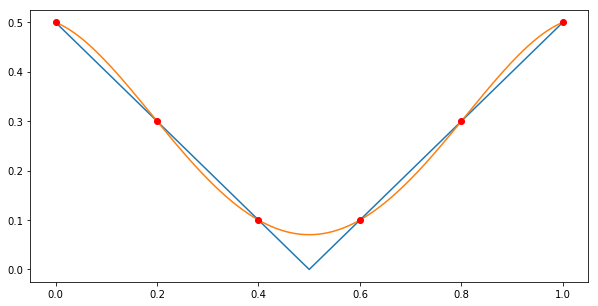

In [8]:
# A little "macro". This assumes Ln, q, and x are all defined
# Notice: technically this is a python function. However, it 
# expects symbols and variables to be defined in the global scope
# and this is **not** good programming style. It may be very 
# useful and fast at times, but try not to overdo it.
#
# I'd call it a function if internally it did not use any globally
# defined variable.

def my_plot(f):
    figure(figsize=[10,5])
    y = Ln.dot(f(q))
    _ = plot(x, f(x))
    _ = plot(x, y)
    _ = plot(q, f(q), 'ro')
    show()

my_plot(sin)
my_plot(cos)

# When we need something more complicated than simply cos, or sin, 
# we can use "on the fly" function definitions, or lambda functions:
my_plot(lambda x: cos(2*pi*x))

# Lambda functions can be assigned too, for convenience and later 
# reuse...
runge = lambda x: 1.0/(1+50*(.5-x)**2)
my_plot(runge)

# Alternatively, you can define the function in the classical pythonic
# way:
def shifted_abs(x):
    return abs(x-.5)

my_plot(shifted_abs)

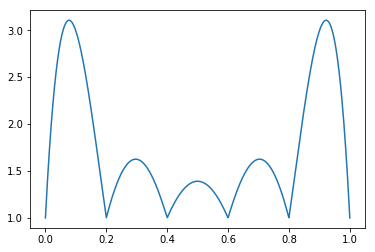

In [37]:
lebesgue = sum(abs(Ln), axis=1)
plot(x, lebesgue)

In [36]:
lebesgue.shape

(1025,)